### Basic regresyon models

In [6]:
import pandas as pd
df=pd.read_csv("Advertising.csv")
#index problemlerini gidermek adına iloc
df=df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
#veri setinin yapısını incelemek
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


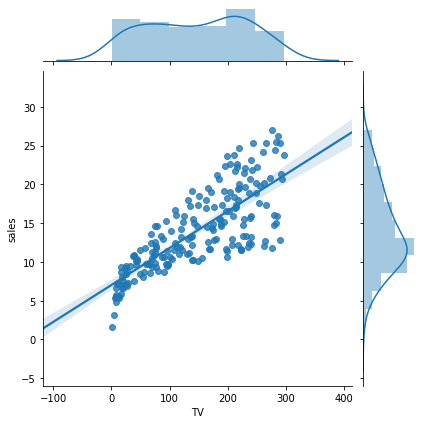

In [8]:
import seaborn as sns
#joinplat ile aradaki ilişkiyi modellemek
sns.jointplot(x="TV",y="sales" ,data=df,kind="reg");


In [ ]:
#tv reklam harcaması artarsa satış artar

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
#x->bağimlı değişken
#y->bağımsız değişken
x=df[["TV"]]
x.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [11]:
y=df[["sales"]]
#model nesnesi oluşturma
reg=LinearRegression()

In [12]:
#model kurmak
model=reg.fit(x,y)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
#model nesnesinden b0 değerini almak
model.intercept_

array([7.03259355])

In [14]:
#model nesnesinden b1 değerini almak
model.coef_

array([[0.04753664]])

In [15]:
#rkare, model skorunu ifade eder
model.score(x,y)

0.611875050850071

Basit Doğrusal Regresyon Tahmin

In [2]:
#Kurulan modelin tahmin edilmesi

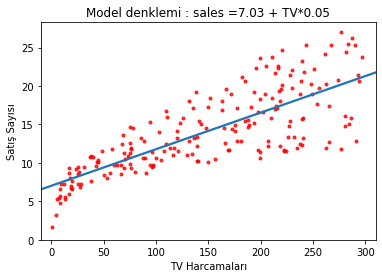

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
g=sns.regplot(df["TV"],df["sales"],ci=None,scatter_kws={'color':'r','s':9})
g.set_title("Model denklemi : sales =7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10,310)
plt.ylim(bottom = 0);

In [21]:
#saçılım grafiğindeki mavi doğru model denkemi, kırmızı noktalar gerçek değerler

In [25]:
#TAHMİN
model.predict(([[165]]))# 165 boğımsız değişken yani x

array([[14.87613922]])

In [26]:
#TAHMİN 2.yol
model.intercept_+model.coef_*165

array([[14.87613922]])

In [27]:
#TAHMİN 3.yol
yeni_veri=[[5],[15],[30]]
model.predict(yeni_veri)

array([[7.27027675],
       [7.74564316],
       [8.45869276]])

In [28]:
#yeni verilere göre satış tahminleri y= 5-> x= 7.27 


Artıklar ve Makina öğrenmesi önemi

In [29]:
#AMAÇ = gerçek değerler ile tahmin edilen değerler arası farkı minimum yapmak
#MSE =  hata kareler ortalaması
#RMSE = hata kareler ortalaması kare kökü

y.head()#satış sayıları verileri


,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [30]:
model.predict(x)[0:6]#TV harcamalarına göre satış tahminleri


array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232]])

In [44]:
gercek_y = y[0:10]#satışların 1 ile 10 arası değerleri
tahmin_edilen_y = pd.DataFrame(model.predict(x)[0:10])#TV harcamalarına göre satış tahminlerinin 1 ile 10 uncu değerleri data frame e çevrimiş hali
hatalar = pd.concat([gercek_y,tahmin_edilen_y], axis=1)#sutun bazında birleştirdim
hatalar.columns = ["gercek_y","tahmin_edilen_y"]#sutun isimlendirdik
hatalar

,gercek_y,tahmin_edilen_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [48]:
hatalar["hata"]= hatalar["gercek_y"]-hatalar["tahmin_edilen_y"]#Aradaki farkı alarak hata oranını hesapladık
hatalar["hata_kare"]=hatalar["hata"]**2#kare alma işlemi ile hatadaki eksi değerlerin + değerleri götürme işlemine engellemek
hatalar

,gercek_y,tahmin_edilen_y,hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [52]:
import numpy as np
np.mean(hatalar["hata_kare"])

9.290350329638105

In [ ]:
#bizim modelimiz şu kadar başarılı, hata kareler ort 9.29 birimdir

### Multi Doğrusal Regresyon

 #Model

In [3]:
import pandas as pd
df=pd.read_csv("Advertising.csv")
#index problemlerini gidermek adına iloc
df=df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
x=df.drop('sales',axis=1)#bağımlı değişken
y=df[["sales"]]#bağımsız değişken

Modellem için iki farklı yaklaşım vardır

In [63]:
#statsmodels ile model kurmak
import statsmodels.api as sm
lm=sm.OLS(y,x)#regresyon modeli kurmak için gerekli func olm
model=lm.fit()#modeli kur
model.summary()#modelin özetini ver 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Sun, 03 Oct 2021   Prob (F-statistic):                   2.43e-171
Time:                        17:24:32   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
radio          0.2222      0.009     23.595      0.000       0.204       0.241
newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
#scikit learn ile model kurmak

from sklearn.linear_model import  LinearRegression
lm=LinearRegression()
model=lm.fit(x,y)#model kuruldu
model.intercept_ #sabit


array([2.93888937])

In [6]:
model.coef_ #Katsayılar

array([[ 0.04576465,  0.18853002, -0.00103749]])

#### Tahmin

**Sales = 2.94 + TV * 0.04 + radio * 0.19 - newspaper * 0.001**

30 birim TV, 10 birim radio, 40 birim gazete 

In [7]:
yeni_veri=[[30],[10],[40]]
import pandas as pd
yeni_veri=pd.DataFrame(yeni_veri).T
yeni_veri

,0,1,2
0,30,10,40


In [8]:
model.predict(yeni_veri)

array([[6.15562918]])

başarıyı değerlendirme

In [9]:
from sklearn.metrics import mean_squared_error
y.head()
model.predict(x)[0:10]

MSE = mean_squared_error(y, model.predict(x))
MSE


2.784126314510936

In [ ]:
#hata kareler ortalaması 2.78

In [10]:
import numpy as np
RMSE=np.sqrt(MSE)
RMSE

1.6685701407225697

Birim başı o ortalama yapılacak hata 2.78 dir

 #### Çoklu Doğrusal Regresyon Model Tuning

In [11]:
x.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [12]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


##### sınama testi

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=99)

veri setini test ve train olarak ikiye ayırdık, train setinin içinde bağimsız ve bağımlı değ olacak hakeza test setinde de

In [14]:
x_train.head()

,TV,radio,newspaper
16,67.8,36.6,114.0
51,100.4,9.6,3.6
97,184.9,21.0,22.0
164,117.2,14.7,5.4
71,109.8,14.3,31.7


In [15]:
x_test.head()

,TV,radio,newspaper
135,48.3,47.0,8.5
127,80.2,0.0,9.2
191,75.5,10.8,6.0
66,31.5,24.6,2.2
119,19.4,16.0,22.3


In [16]:
y_train.head()

,sales
16,12.5
51,10.7
97,15.5
164,11.9
71,12.4


In [18]:
y_test.head()

,sales
135,11.6
127,8.8
191,9.9
66,9.5
119,6.6


In [25]:
#model kurmak
from sklearn.linear_model import  LinearRegression
import numpy as np
lm=LinearRegression()
model=lm.fit(x_train,y_train)
np.sqrt(mean_squared_error(y_train,model.predict(x_train)))

1.7236824822650754

###### eğitim hatası 1.72

Eğitim hatası varsa test hatası da vardır

In [26]:
np.sqrt(mean_squared_error(y_test,model.predict(x_test)))

1.4312783138301641

###### test hatası 1.43 

In [29]:
#k-katlı cv
from sklearn.model_selection import cross_val_score
cross_val_score(model,x_train,y_train,cv=10,scoring="neg_mean_squared_error")
 #sonucunda 10 tane hata elde edild sonuçlar negatif old için
#cv mse
np.mean(-cross_val_score(model,x_train,y_train,cv=10,scoring="neg_mean_squared_error"))

3.3170289742341246

###### train setine ilişkin ortalama hatamız 3,31

In [30]:
#cv rmse
np.sqrt(np.mean(-cross_val_score(model,x_train,y_train,cv=10,scoring="neg_mean_squared_error")))

1.8212712522395242